In [7]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
# Mounting Google Drive
dir = os.getcwd()
path = os.path.join(dir, 'afhq_cat' )

In [8]:
img_folder = os.listdir(path)
image_list = []
for inFolder in img_folder:
  img_path = os.path.join(path, inFolder) #find the path of the file 
  image = Image.open(img_path) #open the image pile
  resized_img = image.resize((64,64), resample=Image.BILINEAR) # resize all of the images to 64 * 64
  arr_img = np.array(resized_img) # convert the image to np array
  flattened_img = arr_img.reshape((4096,3)) # flatten the image array to 4096 * 3
  flattened_img_float = flattened_img.astype(np.float32)
  image_list.append(flattened_img_float)


  
  


In [9]:
num_files = len([f for f in img_folder if os.path.isfile(os.path.join(path, f))])
X = np.stack(image_list) # creating an array 3D array 
# Slicing X as Xi = X[:, :, i],
X_red = X[:, :, 0] # 0 is for red
X_green = X[:, :, 1] # 1 is for green
X_blue = X[:, :, 2] # 2 is for blue
X_red.shape

(5653, 4096)

Q1.1)

In [10]:
means = []
def findEigens(X, num_of_pca):
  X_centered = X - np.mean(X, axis = 0)  #centering each data subtracting from its mean
  means.append(np.mean(X, axis = 0))
  #finding covariance matrix of X_red_centered
  X_cov_matrix = np.cov(X_centered, rowvar = False)
  eigenval, eigenvec = np.linalg.eig(X_cov_matrix)
  sorted_indices = np.argsort(eigenval)[::-1]
  sorted_eigenvecs = eigenvec[:, sorted_indices]
  sorted_eigenvals = eigenval[sorted_indices]
  total_var = np.sum(sorted_eigenvals) #find the total variances of data
  pve_mat = sorted_eigenvals /total_var # propartion of variance explained

  
  return pve_mat, sorted_eigenvecs[:,:num_of_pca] #NOT SURE WHY [:,:10]


In [11]:
def findKValue(eigenval):
    sum = 0
    i= 0
    while sum < 0.70:
        sum += eigenval[i]
        print(f"PVE for k = {i}: " + str(eigenval[i]) + "and Sum: " + str(sum))
        i += 1

X_red_pve,  X_red_vectors = findEigens(X_red,10)
print("K values for red")
findKValue(X_red_pve)

X_green_pve,  X_green_vectors= findEigens(X_green,10)
print("K values for green")
findKValue(X_green_pve)

print("K values for blue")
X_blue_pve,  X_blue_vectors = findEigens(X_blue,10)
findKValue(X_blue_pve)







K values for red
PVE for k = 0: 0.23506969936509642and Sum: 0.23506969936509642
PVE for k = 1: 0.15651115205729457and Sum: 0.39158085142239096
PVE for k = 2: 0.09005253857295066and Sum: 0.4816333899953416
PVE for k = 3: 0.0682995468320033and Sum: 0.5499329368273449
PVE for k = 4: 0.03752733951079797and Sum: 0.5874602763381429
PVE for k = 5: 0.023947539135634372and Sum: 0.6114078154737773
PVE for k = 6: 0.022764658779106106and Sum: 0.6341724742528834
PVE for k = 7: 0.02112820946671399and Sum: 0.6553006837195974
PVE for k = 8: 0.017935920584482578and Sum: 0.6732366043040799
PVE for k = 9: 0.013493609049165018and Sum: 0.6867302133532449
PVE for k = 10: 0.011451434296995695and Sum: 0.6981816476502406
PVE for k = 11: 0.010002628401858199and Sum: 0.7081842760520988
K values for green
PVE for k = 0: 0.20873714854752023and Sum: 0.20873714854752023
PVE for k = 1: 0.15884565962530695and Sum: 0.3675828081728272
PVE for k = 2: 0.0925885686263801and Sum: 0.4601713767992073
PVE for k = 3: 0.06811111

Q1.2)

(10, 64, 64)


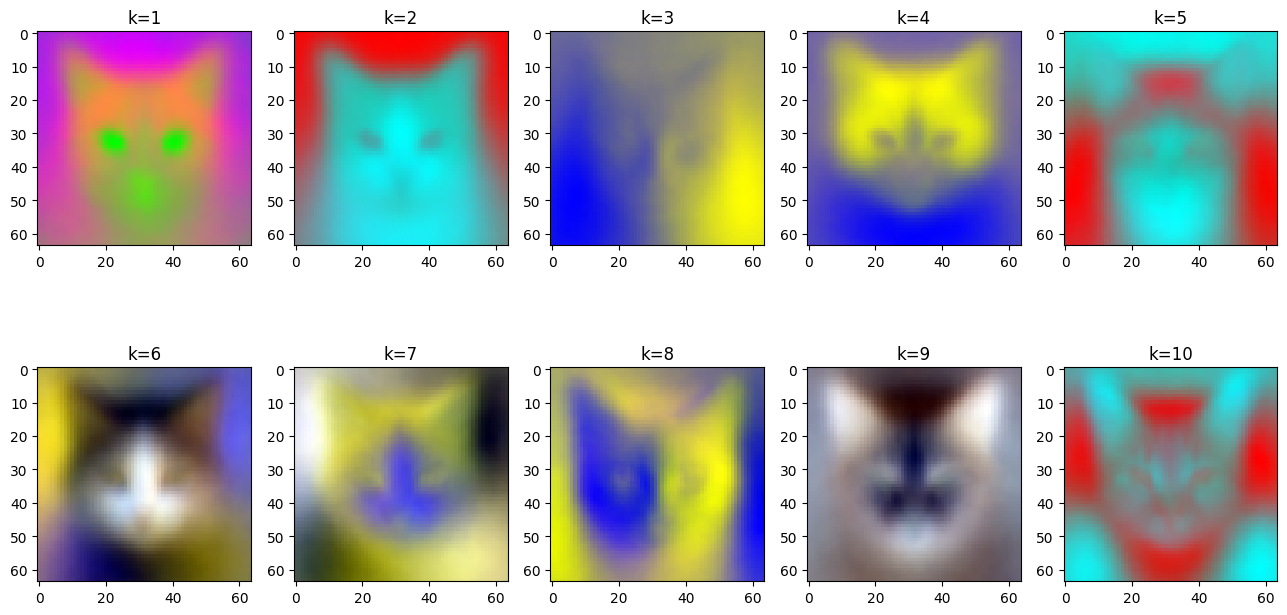

In [12]:
def reshapeMatrix(matrix):
    eigenvectors_64 = []
    for i in range(matrix.shape[1]):
        eigvec = matrix[:,i:i+1].reshape(64, 64)
        eigvec = (eigvec - np.min(eigvec)) / (np.max(eigvec)- np.min(eigvec))
        eigenvectors_64.append(eigvec)
    return eigenvectors_64

def findEigenVecsStack(X_red_vectors, X_green_vectors, X_blue_vectors):
    # Reshape each principal component to a 64x64 matrix
    X_red_vector = np.array(reshapeMatrix(X_red_vectors))
    X_green_vector = np.array(reshapeMatrix(X_green_vectors))
    X_blue_vector = np.array(reshapeMatrix(X_blue_vectors))
    print(X_red_vector.shape)

    eigenvectors_stack = np.stack([X_red_vector, X_green_vector, X_blue_vector], axis=3)
    return eigenvectors_stack

eigenvectors_stack = findEigenVecsStack(X_red_vectors, X_green_vectors, X_blue_vectors)

fig, axs = plt.subplots(2, 5, figsize=(16, 8))  # create a 2x5 grid of subplots
for i in range(10):
    row = i // 5 
    col = i % 5  
    axs[row, col].imshow(eigenvectors_stack[i,:,:,:])
    axs[row, col].set_title(f'k={i+1}')
plt.show()

Q1.3)

In [13]:
img_path = os.path.join(path, 'flickr_cat_000003.jpg') #find the path of the file 
img = Image.open(img_path) #open the image pile

img = img.resize((64, 64), Image.BILINEAR) #resize the image to 64,64

cat_img_array = np.array(img).astype(np.float32)
flattened_cat_img = cat_img_array.reshape((4096,3)) # flatten the image array to 4096 * 3

# Slicing X as Xi = X[:, :, i],
cat_red = flattened_cat_img[:, 0] -means[0] # 0 is for red
cat_green = flattened_cat_img[:, 1]-means[1] # 1 is for green
cat_blue = flattened_cat_img[:, 2]-means[2] # 2 is for blue


X_red_pve,  X_red_vectors = findEigens(X_red,4096)
X_green_pve,  X_green_vectors= findEigens(X_green,4096)
X_blue_pve,  X_blue_vectors = findEigens(X_blue,4096)


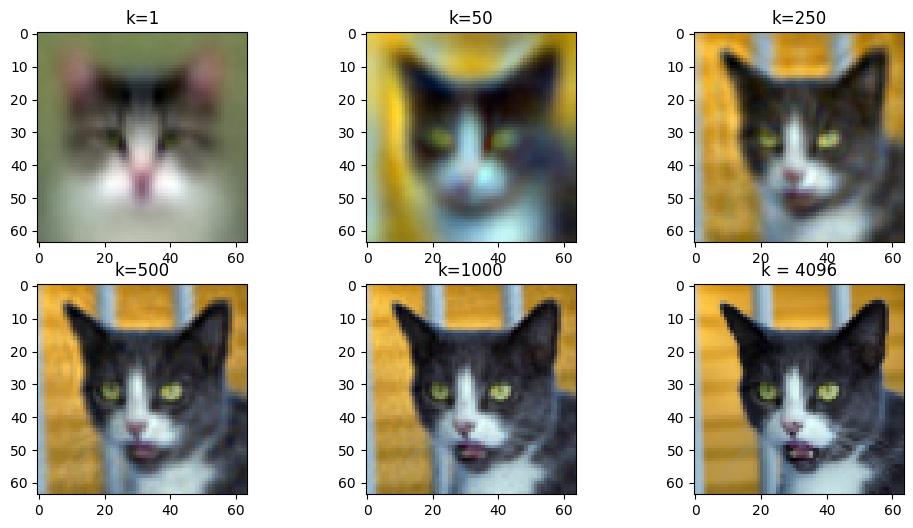

In [14]:
i = 0
fig, axs = plt.subplots(2, 3, figsize=(12, 6))  # create a 2x3 grid of subplots
for k in [1, 50, 250, 500, 1000, 4096]:
    cat_red_centered = cat_red 
    cat_green_centered = cat_green
    cat_blue_centered = cat_blue 

    a = np.dot(cat_red_centered, X_red_vectors[:,:k]) 
    b = np.dot(cat_green_centered, X_green_vectors[:,:k])  
    c = np.dot(cat_blue_centered, X_blue_vectors[:,:k]) 

    tran_red, tran_green, tran_blue = (np.dot(a, X_red_vectors[:,:k].T) + means[0]).reshape(64,64), (np.dot(b, X_green_vectors[:,:k].T) + means[1]).reshape(64,64), (np.dot(c, X_blue_vectors[:,:k].T) + + means[2]).reshape(64,64) 
    scaled_red, scaled_green, scaled_blue = (tran_red - np.min(tran_red))/(np.max(tran_red)- np.min(tran_red)), (tran_green - np.min(tran_green))/(np.max(tran_green)- np.min(tran_green)), (tran_blue - np.min(tran_blue))/(np.max(tran_blue)- np.min(tran_blue))

    res_stack = np.dstack((scaled_red , scaled_green , scaled_blue))
        
    row = i // 3  
    col = i % 3  
    axs[row, col].imshow(res_stack)
    axs[row, col].set_title(f'k={k}')
    plt.title('k = {}'.format(k))
    i = i + 1
    
